In [1]:
import csv
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

RANDOM_SEED = 42


2025-04-20 10:56:55.234514: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-20 10:56:55.312692: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-20 10:56:55.354405: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745117815.458002   71549 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745117815.482534   71549 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745117815.630500   71549 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'


# 分類数設定

In [3]:
NUM_CLASSES = 8

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

2025-04-20 10:57:03.035558: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,158 (4.52 KB)

 Trainable params: 1,158 (4.52 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 4s 774ms/step - accuracy: 0.1797 - loss: 2.1424
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1658 - loss: 2.1877 - val_accuracy: 0.1905 - val_loss: 2.1040
Epoch 2/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1641 - loss: 2.2283
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1772 - loss: 2.1474 - val_accuracy: 0.1868 - val_loss: 2.0649
Epoch 3/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1406 - loss: 2.1299
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1489 - loss: 2.1066 - val_accuracy: 0.1868 - val_loss: 2.0329
Epoch 4/1000
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1641 - loss: 2.0182
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
7/7 ━━━━━

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8934 - loss: 0.4896


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[0.1945466  0.31427816 0.02129544 0.11073077 0.29627645 0.02022643
 0.04136521 0.00128102]
1


# 混同行列

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


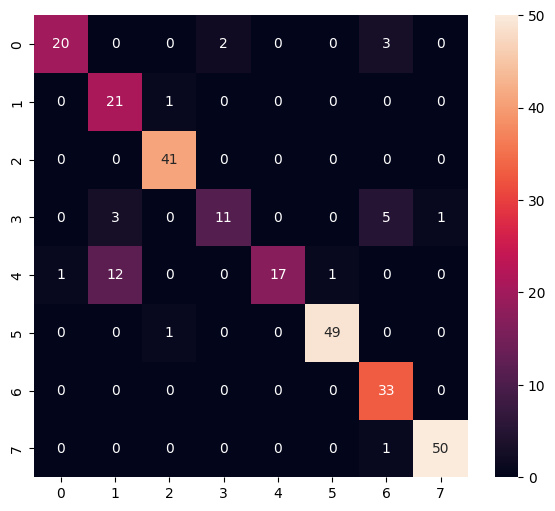

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.58      0.95      0.72        22
           2       0.95      1.00      0.98        41
           3       0.85      0.55      0.67        20
           4       1.00      0.55      0.71        31
           5       0.98      0.98      0.98        50
           6       0.79      1.00      0.88        33
           7       0.98      0.98      0.98        51

    accuracy                           0.89       273
   macro avg       0.89      0.85      0.85       273
weighted avg       0.91      0.89      0.88       273



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpxao4ntbc/assets


INFO:tensorflow:Assets written to: /tmp/tmpxao4ntbc/assets


Saved artifact at '/tmp/tmpxao4ntbc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  139728042746880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139727573893360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139728042745648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139727573904096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139727573909200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139727573906208: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1745117877.244317   71549 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1745117877.244362   71549 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-20 10:57:57.245023: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpxao4ntbc
2025-04-20 10:57:57.246114: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-20 10:57:57.246130: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpxao4ntbc
I0000 00:00:1745117877.252790   71549 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-04-20 10:57:57.254252: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-20 10:57:57.295474: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpxao4ntbc
2025-04-20 10:57:57.309561: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 

6732

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/home/ulbert_allain_odle/hackathon/env310/lib64/python3.10/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 163 μs, sys: 14 μs, total: 177 μs
Wall time: 110 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.19454664 0.31427807 0.02129545 0.11073077 0.2962765  0.02022643
 0.04136522 0.00128102]
1


In [23]:
!which python


/home/ulbert_allain_odle/hackathon/env310/bin/python


In [24]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [25]:
!pip install pandas matplotlib seaborn
